In [1]:
%matplotlib inline

In [ ]:
#Rates calculated with luminosities --- APPROACHED NOT USED IN FINAL PROJECT

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import healpy as hp

In [3]:
#Load data, saved as np.savetxt('galaxyCatalog-short.gz',np.column_stack([ra, dec, finalDist,jmag,kmag,rbandMag]),delimiter='  ',header='ra, dec, distance[Mpc], jMag, kMag, rMag')
MASSra,MASSdec,finalDist,jmag,kmag,rbandMag=np.loadtxt("galaxyCatalog-short.gz",unpack=True)

In [4]:
cool_cmap=cm.jet
cool_cmap.set_under('w')

In [5]:
selec2=((jmag<15)&(finalDist<200)&(finalDist>0))

In [6]:
#Calculate absolute J and K magnitude
absJmag=100*np.ones(len(MASSra))
absJmag[selec2]=jmag[selec2]-5*np.log10(finalDist[selec2]*10**6)+5
absKmag=100*np.ones(len(MASSra))
absKmag[selec2]=kmag[selec2]-5*np.log10(finalDist[selec2]*10**6)+5

In [7]:
#CAlculate solar Lumin
jSolarLum=1000*np.ones(len(MASSra))
bolSun=3.64*np.ones(sum(selec2))
jSolarLum[selec2]=10**((bolSun-absJmag[selec2])/2.5)

/Users/KarenPerezSarmiento/Library/Python/3.5/lib/python/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


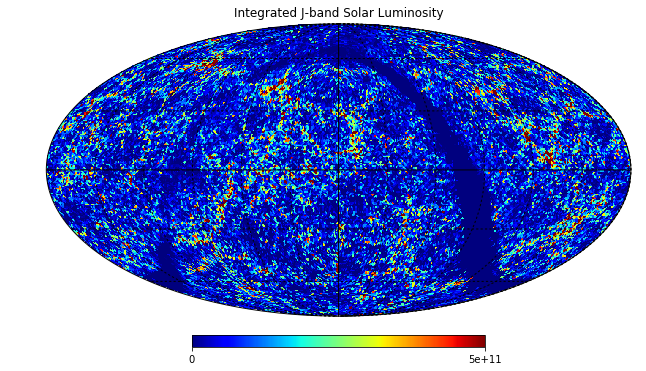

In [8]:
#plot luminosity map (or magnitude map)
pix2=hp.ang2pix(64,MASSra[selec2],MASSdec[selec2],lonlat=True)
lummap=np.zeros(hp.nside2npix(64))
np.add.at(lummap,pix2,jSolarLum[selec2])
magmap=3.64-2.5*np.log10(lummap)
finalMp=hp.mollview(lummap,title='Integrated J-band Solar Luminosity',max=5*10**11,cmap=cool_cmap,return_projected_map=True)
hp.graticule()
plt.show()

In [9]:
#v-Magnitude 13 galaxies
RetII=-3.6
HorI=-3.5
TucII=-3.9
TucIII=-2.4
SegueI=-1.5
ComBer=-4.1
UMaII=-4.2
BooII=-2.7
SegueII=-2.5
BooI=-6.3
Her=-6.6
LeoIV=-5.8
CVnII=-4.9
MagV=[RetII,HorI,TucII,TucIII,SegueI,ComBer,UMaII,BooII,SegueII,BooI,Her,LeoIV,CVnII]
MagJ=MagV-1.05*np.ones(len(MagV))
lumin13=10**(((3.64*np.ones(13))-MagJ)/2.5)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


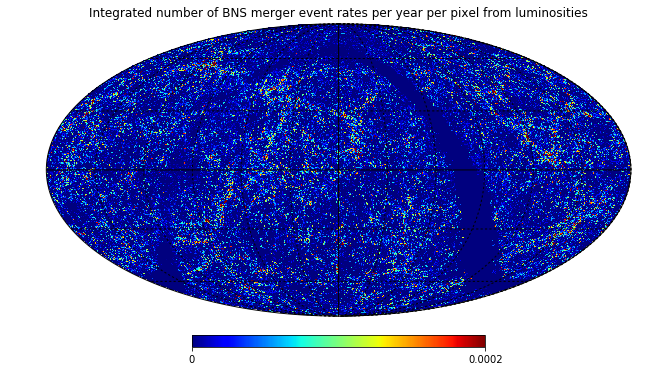

In [10]:
pix2=hp.ang2pix(128,MASSra[selec2],MASSdec[selec2],lonlat=True)
lummap=np.zeros(hp.nside2npix(128))
np.add.at(lummap,pix2,jSolarLum[selec2])
ratemap2=lummap*(1/sum(lumin13))*(1/((13.82*10**9)-(1.003*10**9)))
hp.mollview(ratemap2,title='Integrated number of BNS merger event rates per year per pixel from luminosities',max=0.0002,cmap=cool_cmap)
hp.graticule()
plt.show()

In [11]:
#Calculating rates with luminosities (not used for final project at the end)
def rateAtdist(A):
    selecA=((jmag<15)&(finalDist<A)&(finalDist>0))
    absJmag=100*np.ones(len(MASSra))
    absJmag[selecA]=jmag[selecA]-5*np.log10(finalDist[selecA]*10**6)+5
    jSolarLum=1000*np.ones(len(MASSra))
    bolSun=3.64*np.ones(sum(selecA))
    jSolarLum[selecA]=10**((bolSun-absJmag[selecA])/2.5)
    pix2=hp.ang2pix(64,MASSra[selecA],MASSdec[selecA],lonlat=True)
    lummap=np.zeros(hp.nside2npix(64))
    np.add.at(lummap,pix2,jSolarLum[selecA])
    luminAmpc=sum(lummap)
    volumeT=(10**9)
    volumeA=4*np.pi*(A**3)/3
    lumin1gyr=luminAmpc*volumeT/volumeA
    rateAmpc=luminAmpc*(1/sum(lumin13))*(1/((13.82*10**9)-(1.003*10**9)))
    rate1gyr=rateAmpc*volumeT/volumeA
    return rateAmpc

In [12]:
rateFromLumin=[]
for i in range(0,220,20):
    rateFromLumin=np.append(rateFromLumin, rateAtdist(i))
rateFromLumin

/Users/KarenPerezSarmiento/Library/Python/3.5/lib/python/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/KarenPerezSarmiento/Library/Python/3.5/lib/python/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


array([ 0.        ,  0.0088406 ,  0.04492189,  0.11679104,  0.2918302 ,
        0.52683759,  0.86088149,  1.34667325,  1.9227585 ,  2.62160458,
        3.41537894])